In [1]:
!pip install -q scikit-learn==1.0.1
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics, preprocessing
import itertools

In [2]:
d = {
    "index": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "predicted_y": [
        "malignant",
        "malignant",
        "benign",
        "benign",
        "benign",
        "benign",
        "benign",
        "benign",
        "benign",
        "malignant",
    ],
    "actual_y": [
        "malignant",
        "malignant",
        "malignant",
        "malignant",
        "malignant",
        "benign",
        "benign",
        "benign",
        "benign",
        "benign",
    ],
}
tumour = pd.DataFrame(data=d)


d = {
    "index": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "predicted_y": [
        "malignant",
        "malignant",
        "benign",
        "benign",
        "benign",
        "benign",
        "benign",
        "benign",
        "benign",
        "malignant",
        "borderline",
        "borderline"
    ],
    "actual_y": [
        "malignant",
        "malignant",
        "malignant",
        "malignant",
        "malignant",
        "benign",
        "benign",
        "benign",
        "benign",
        "benign",
        "borderline",
        "malignant"
    ],
}
tumour_multiclass = pd.DataFrame(data=d)

# tumour_multiclass.to_markdown(index=False)

## Confusion Matrix

Before we move on to give the definition of Confusion Matrix, we need to understand the below 4 terminologies. We will use the `tumour` table as reference. 

!!! note
    Note that `actual_y` ($y$) and `predicted_y` ($\hat{y}$) are used interchangeably with `ground_truth` and `predicted_value` respectively.





|   index | predicted_y   | actual_y   |
|--------:|:--------------|:-----------|
|       1 | malignant     | malignant  |
|       2 | malignant     | malignant  |
|       3 | benign        | malignant  |
|       4 | benign        | malignant  |
|       5 | benign        | malignant  |
|       6 | benign        | benign     |
|       7 | benign        | benign     |
|       8 | benign        | benign     |
|       9 | benign        | benign     |
|      10 | malignant     | benign     |

### True Positive (TP)

!!! success "Definition"
    The **actual_y** is positive label and the **predicted_y** from the classifier is also positive label.

### True Negative (TN)

!!! success "Definition"
    The **actual_y** is negative label and the **predicted_y** from the classifier is also negative label.

### False Positive (FP)


!!! success "Definition"
    The **actual_y** is negative label and the **predicted_y** from the classifier is also positive label. This is also called the Type 1 Error.

### False Negative (FN)

!!! success "Definition"
    The **actual_y** is positive label and the **predicted_y** from the classifier is also negative label. This is also called the Type 2 Error.


### Confusion Matrix

!!! success "Definition"
    In binary classification, a confusion matrix is a $2 \times 2$ matrix[^1] which reports the number of false positives, false negatives, true positives, and true negatives. Conventionally, the matrix's first row is made up of TP and FP while the second row is made up of FN and TN.
  
<figure>
    <img src='https://storage.googleapis.com/reighns/reighns_ml_projects/docs/metrics/classification_metrics/confusion_matrix.jpg' width="200" height="200"/>
    <figcaption>Basic Confusion Matrix, courtesy of Analytics Vidhya.</figcaption>
</figure>

This allows more detailed analysis than mere proportion of correct classifications such as Accuracy. As we have seen earlier, Accuracy is not a reliable metric for the real performance of a classifier, because it will yield misleading results if the data set is imbalanced (that is, when the numbers of observations in different classes vary greatly).


[^1]: Can be generalized to N by N for multiclass classification.


---

!!! warning
    Based on your use case, it is important to define clearly which is your positive class. In our tumour classification example, I mentioned that is the positive class. 
    

Let us see both in action, in the first figure below, we use scikit-learn's confusion matrix class; take note that the confusion matrix in scikit-learn outputs the opposite direction as what we have mentioned: TN, FP, FN, TP.

We input the `labels=["benign", "malignant"]` to indicate that malignant is treated as the positive class and vice versa.

In [3]:
def plot_confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray, title: str, tick_labels: List[str]) -> None:
    """Plots a Binary Confusion Matrix.

    Args:
        y_true (np.ndarray): the actual labels.
        y_pred (np.ndarray): the predicted labels.
        title (str): the title of the plot.
        tick_labels (List[str]): The labels for the ticks.
    """

    # Unravel into tn, fp, fn and tp
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred, labels=tick_labels).ravel()

    # reshape into tp, fp, fn, tn - this is personal preference
    reshaped_cm = np.asarray([[tp, fp], [fn, tn]])

    # flatten this 2d array
    cm_flattened = reshaped_cm.flatten()

    labels = ["True Positive", "False Positive", "False Negative", "True Negative"]
    annot = (np.asarray([f"{label}\n{cm_count}" for label, cm_count in zip(labels, cm_flattened)])).reshape(2, 2)

    ax = plt.subplot()
    heatmap = sns.heatmap(
        reshaped_cm, annot=annot, fmt="", cmap="Greens", ax=ax, xticklabels=tick_labels, yticklabels=tick_labels
    )
    ax.set_title(title)
    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True labels")
    plt.show()

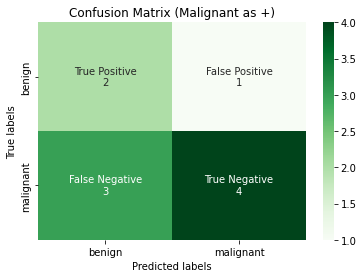

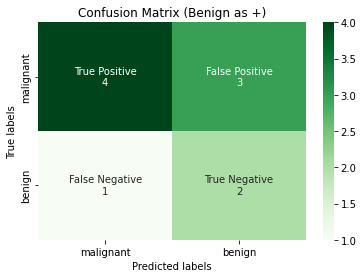

In [4]:
y_true = tumour.actual_y
y_pred = tumour.predicted_y

plot_confusion_matrix(y_true, y_pred,title='Confusion Matrix (Malignant as +)', tick_labels = ['benign', 'malignant']);
plot_confusion_matrix(y_true, y_pred,title='Confusion Matrix (Benign as +)', tick_labels = ['malignant', 'benign']);

### When to use Confusion Matrix?

The Confusion matrix in itself is not a performance measure, but the information that it carries is so valuable that almost all the other classification metrics will need to refer to the confusion matrix. For example, the AUROC score can be calculated from confusion matrix.

### Benefit Structure

We may ask ourselves, if we cannot minimize both FN and FP together at the same time due to a tradeoff, which one should we place more emphasis on? In our case study, we note that since our positive class is malignant, then it is apparent that we want to minimize the False Negatives, because misclassifying a cancer patient as benign yields a higher cost than misclassifying a benign patient as cancer. We introduce a benefit structure as follows:

- TP: +\$10000
- FN: -\$10000
- FP: -\$1000
- TP+FP: -\$100

The above metrics indicates a cost-benefit structure. The cost of the screening costs \$100. Each True Positive will yield us a profit of \$10000, each False Negative will cost us \%10000, and each FP costs us \$1000. Hence, we can easily deduce from the confusion matrix that the cost in our example is:

$$2 * 10000 - 3 * 10000 - 1 * 1000 - 3 * 100$$

### Implementation of Confusion Matrix

In [5]:
def confusion_matrix_(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
    """Calculates the confusion matrix.

    This can be used in both binary and multiclass classification provided that we label binarized the multiclass labels.

    Args:
        y_true (np.ndarray): the correct labels, shape (n_samples, )
        y_pred (np.ndarray): the predicted labels, shape (n_samples, )

    Returns:
        cm (np.ndarray): the confusion matrix, shape (n_classes, n_classes) with tp, fp, fn, tn in each row
    """
    tp, fp, fn, tn = 0, 0, 0, 0

    for y_t, y_p in zip(y_true, y_pred):
        # if actual and predicted both are positive class
        if y_t == y_p == 1:
            tp += 1
        # if actual and predicted both are negative class
        elif y_t == y_p == 0:
            tn += 1
        # if actual is negative and predicted is positive
        elif y_t == 0 and y_p == 1:
            fp += 1
        # if actual is positive and predicted is negative
        elif y_t == 1 and y_p == 0:
            fn += 1

    cm = np.asarray([[tp, fp], [fn, tn]])
    return cm

In [6]:
y_true = np.asarray([1, 1, 0, 1, 0, 0, 1, 1])
y_pred = np.asarray([1, 1, 1, 0, 0, 0, 1, 1])

tp, fp, fn, tn = confusion_matrix_(y_true, y_pred).ravel()
print("Outcome values : \n", tp, fn, fp, tn)
print("Outcome values : \n", confusion_matrix_(y_true, y_pred))

# We can check against `sklearn`.
# confusion matrix, set positive class to be positive 1, note the position is different from mine, sklearn uses
tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
print("Confusion matrix : \n", metrics.confusion_matrix(y_true, y_pred, labels=[0, 1]))
print("Outcome values : \n", tp, fn, fp, tn)

Outcome values : 
 4 1 1 2
Outcome values : 
 [[4 1]
 [1 2]]
Confusion matrix : 
 [[2 1]
 [1 4]]
Outcome values : 
 4 1 1 2


## Multiclass Confusion Matrix

??? question
    Now suppose we add another class to the dataset, how should we then calculate the confusion matrix? We first use scikit-learn to plot it out.

|   index | predicted_y   | actual_y   |
|--------:|:--------------|:-----------|
|       1 | malignant     | malignant  |
|       2 | malignant     | malignant  |
|       3 | benign        | malignant  |
|       4 | benign        | malignant  |
|       5 | benign        | malignant  |
|       6 | benign        | benign     |
|       7 | benign        | benign     |
|       8 | benign        | benign     |
|       9 | benign        | benign     |
|      10 | malignant     | benign     |
|      11 | borderline    | borderline |
|      12 | borderline    | malignant  |

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    Reference: https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python 
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


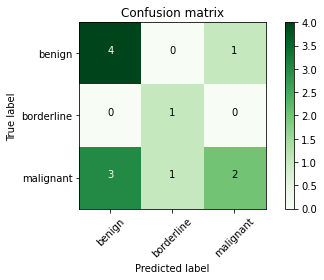

In [8]:
y_true = tumour_multiclass.actual_y
y_pred = tumour_multiclass.predicted_y
cm_multiclass = metrics.confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm_multiclass, classes = ['benign', 'borderline', 'malignant'])

!!! example
    Notice that we still can have a "confusion matrix" because plotting the above does not require you to define which label is positive or not, we just need labels to plot the values out. 

!!! note
    However, if we were to treat benign as the positive class, and treat both borderline and malignant as the negative class, then we can make sense of the definitions of TP, FP, FN and TN here. In fact, this scheme is called One-vs-Rest and we will have 3 different confusion matrices, parametrized by the number of classes (so if num_classes = n, then there will be n different confusion matrices).
    The below image illustrates the three different scenarios.



<figure>
    <img src='https://storage.googleapis.com/reighns/reighns_ml_projects/docs/metrics/classification_metrics/multiclass_confusion_matrix.PNG' width="1250" height="750"/>
    <figcaption>Multiclass Confusion Matrix by Hongnan G.</figcaption>
</figure>

The above idea looks simple on paper, but there are a few details that one should know. More specifically, micro-average and macro-average of multiclass evaluation metrics, which we will go through in the next section.



## Multilabel Confusion Matrix

TODO: [^1]

[^1]: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html